In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [4]:
medical = pd.read_csv(r"C:\Users\ehsan\Downloads\archive\insurance.csv")

## Take a Quick Look at the Data Structure

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [8]:
medical.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


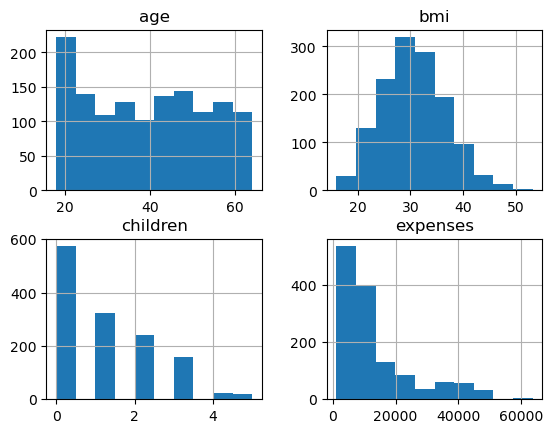

In [9]:
medical.hist()
plt.show()

In [12]:
# age, children and charges are positively skewed
# bmi is normal

## Create a Test Set

In [13]:
RS = 13

In [14]:
X = medical.drop(["expenses"], axis = 1)
y = medical[["expenses"]]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = RS)

## Explore and Visualize the Data to Gain Insights

In [16]:
X_train

,age,sex,bmi,children,smoker,region
448,40,female,29.6,0,no,southwest
443,59,female,36.5,1,no,southeast
581,19,male,30.6,0,no,northwest
913,44,female,27.5,1,no,southwest
708,31,female,30.5,3,no,northeast
...,...,...,...,...,...,...
866,18,male,37.3,0,no,southeast
742,53,male,34.1,0,yes,northeast
74,44,male,27.4,2,no,southwest
176,38,male,27.8,2,no,northwest


In [17]:
train = X_train.copy()
train["expenses"] = y_train.copy()

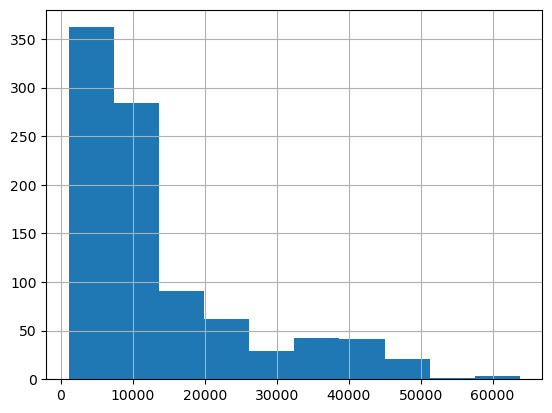

In [18]:
train["expenses"].hist()
plt.show()

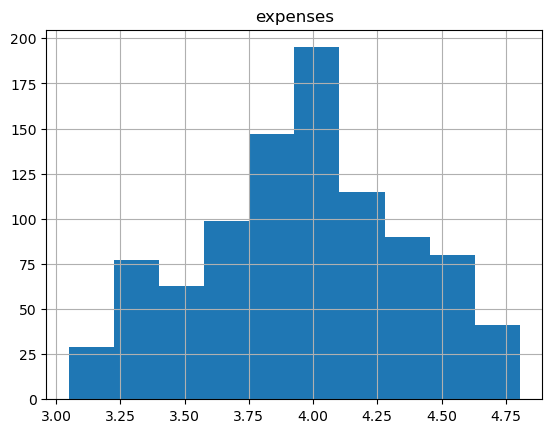

In [20]:
pd.DataFrame(np.log10(train.expenses)).hist()
plt.show()

Now let's look at the mean expenses by region

In [21]:
train[["region","expenses"]].groupby(["region"]).mean()

,expenses
region,
northeast,13265.552500
northwest,13225.413408
southeast,14871.819119
southwest,12466.903922


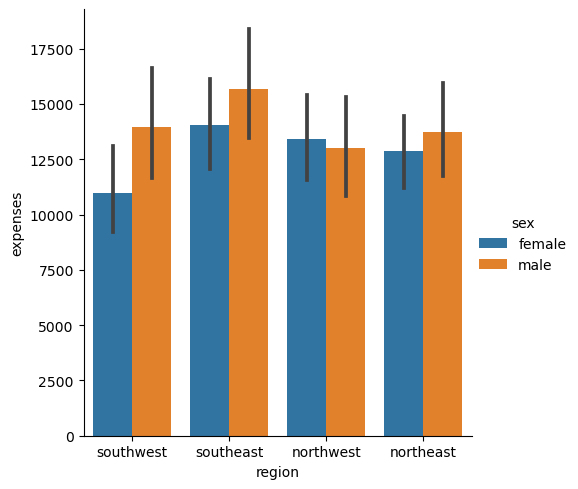

In [23]:
sns.catplot(data = train, x = "region", y = "expenses", hue = "sex", kind = "bar")
plt.show()

In [24]:
 # males charges are more than females (in 3/4 cases)
# southwest has the lowest expenses for females
# northwest has the lowest expenses for males
# southeast has the highest expenses for both

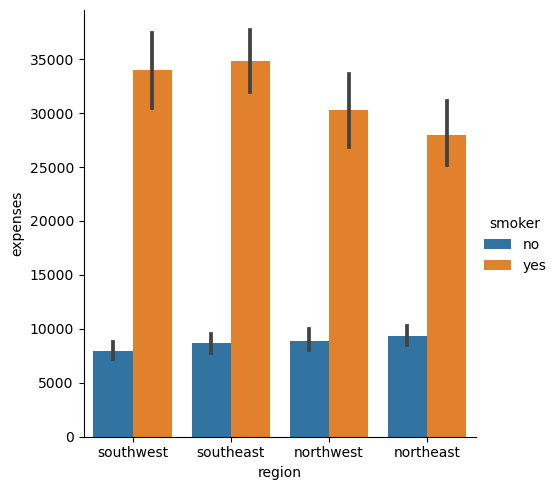

In [25]:
sns.catplot(data = train, x = "region", y = "expenses", hue = "smoker", kind = "bar")
plt.show()

In [26]:
# smokers has 3 times more charges than non-smokers
# north east has the highest charges for non-smokers, but the lowest charges for smokers

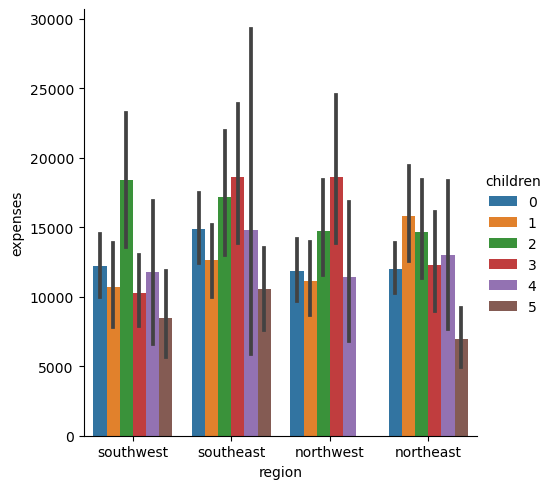

In [27]:
sns.catplot(data = train, x = "region", y = "expenses", hue = "children", kind = "bar")
plt.show()

In [29]:
# in southwest family with 2 children has the highest expenses and with 5 childern hast the lowest expenses
# in southeast family with 3 children has the highest expenses and with 5 children hast the lowest expenses
# in northwest family with 3 children hast the highest expenses and with 1 child has the lowest expenses
# in northeast family with 1 child has the highest expenses and with 5 children has the lowest expenses

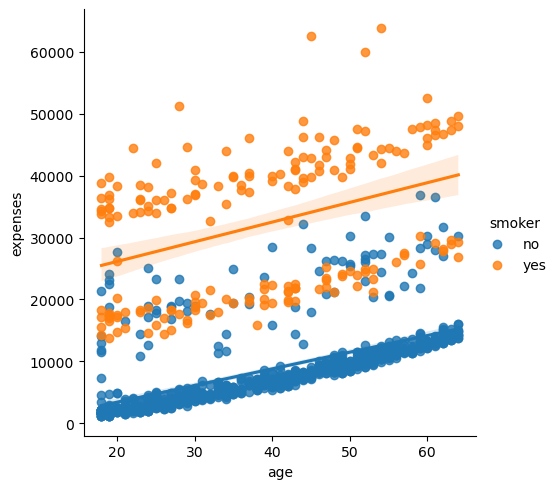

In [30]:
sns.lmplot(data = train,x = "age", y = "expenses", hue = "smoker",)
plt.show()

In [32]:
# age and smoking both positively effect on expenses 

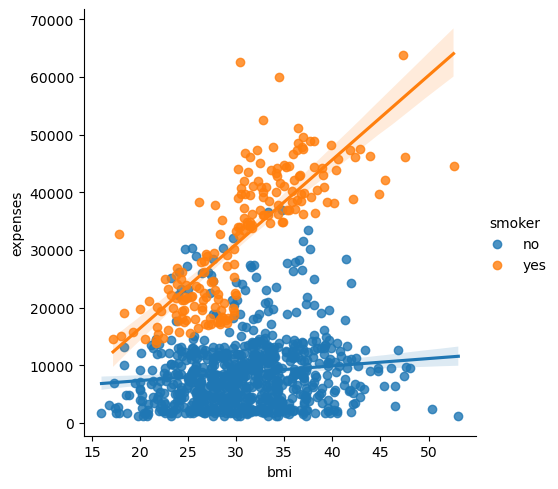

In [33]:
sns.lmplot(data = train,x = "bmi", y = "expenses", hue = "smoker",)
plt.show()

In [35]:
# smoking highly effect on expenses
# bmi effect on expenses, but needs more clear plot for analyze 

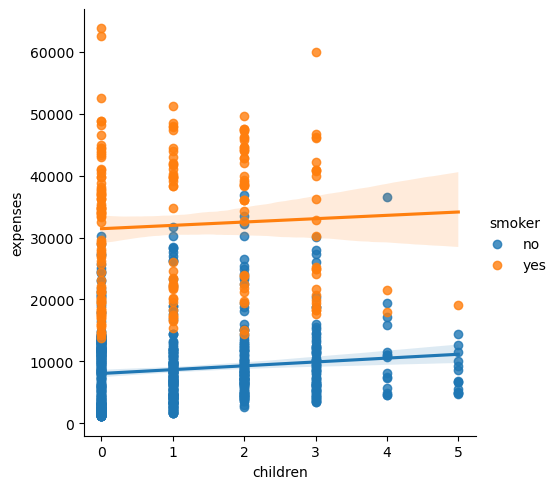

In [36]:
sns.lmplot(data = train,x = "children", y = "expenses", hue = "smoker",)
plt.show()

In [37]:
# outliers of expenses are mostly smokers and have less than 4 children

## Look for Correlations

In [38]:
train.corr()

C:\Users\ehsan\AppData\Local\Temp\ipykernel_18044\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,age,bmi,children,expenses
age,1.000000,0.130859,0.025381,0.295932
bmi,0.130859,1.000000,0.023242,0.198857
children,0.025381,0.023242,1.000000,0.051307
expenses,0.295932,0.198857,0.051307,1.000000


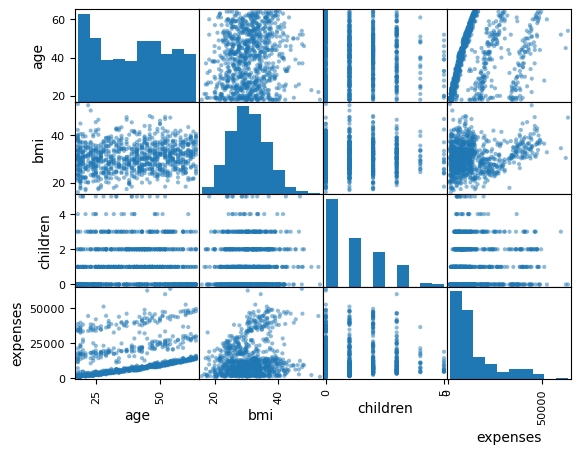

In [39]:
pd.plotting.scatter_matrix(train)
plt.show()

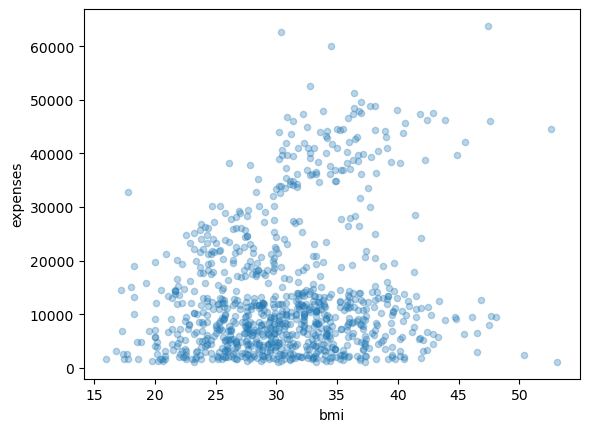

In [40]:
train.plot(kind = 'scatter', x = "bmi", y = 'expenses', alpha = 0.3)
plt.show()

## Transformation Pipelines

In [41]:
num_attribs = ["age", "bmi", "children"]
cat_attribs = ["sex", "smoker", "region"]

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", drop = 'first'))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)])

X_train_perpared = preprocessing.fit_transform(X_train)

print(X_train_perpared.shape)
print(preprocessing.get_feature_names_out())

(936, 8)
['num__age' 'num__bmi' 'num__children' 'cat__sex_male' 'cat__smoker_yes'
 'cat__region_northwest' 'cat__region_southeast' 'cat__region_southwest']


## Select and Train a Model
## Train and Evaluate on the Training Set

In [42]:
lin_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("linear_regression",LinearRegression())
])

lin_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linear_regression', LinearRegression())])

In [43]:
y_predictions_lin = lin_reg.predict(X_test)
y_predictions_lin[:5]

array([[ 3575.6551493 ],
       [10221.74941207],
       [ 7412.76832986],
       [ 6223.59017891],
       [ 2554.28861909]])

In [44]:
lin_rmse = mean_squared_error(y_test, y_predictions_lin, squared=False)
lin_rmse

5834.215012604741

In [45]:
dt_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("decision_tree",DecisionTreeRegressor(random_state=RS))
])

dt_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('decision_tree', DecisionTreeRegressor(random_state=13))])

In [46]:
y_predictions_dt = dt_reg.predict(X_test)
y_predictions_dt[:5]

array([ 2055.32, 12224.35,  4320.41,  5266.37,  2457.21])

In [47]:
dt_rmse = mean_squared_error(y_test, y_predictions_dt, squared=False)
dt_rmse

6163.370598956676

## Better Evaluation Using Cross-Validation

In [48]:
tree_pipeline = Pipeline([
    ("preprocessing",preprocessing),
    ("tree", DecisionTreeRegressor(random_state = RS))
])

tree_rmses = cross_val_score(tree_pipeline, 
                              X_train, y_train,
                              scoring="neg_root_mean_squared_error", 
                              cv=10)
tree_rmses

array([-5738.42126011, -6994.39261332, -7195.17145432, -8672.21013206,
       -7044.83034368, -6795.4563955 , -7845.73809068, -7210.95135697,
       -6340.9527927 , -6414.97225362])

In [49]:
np.mean(tree_rmses * -1)

7025.309669295091

In [50]:
np.median(tree_rmses * -1)

7019.611478501711

In [51]:
rfr_reg = Pipeline([
    ("preprocessing",preprocessing),
    ("random_forest",RandomForestRegressor(random_state=RS))
])
rfr_reg.fit(X_train, y_train)

C:\Users\ehsan\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('random_forest', RandomForestRegressor(random_state=13))])

In [52]:
y_predictions_rfr = rfr_reg.predict(X_test)
y_predictions_rfr[:5]

array([ 2613.4247, 12489.6911,  7573.6824,  5091.566 ,  3079.6183])

In [53]:
rfr_rmse = mean_squared_error(y_test, y_predictions_rfr, squared=False)
rfr_rmse

4282.076946647407

## Fine-Tune Your Model
## Randomized Search for Good Hyperparameters

In [54]:
full_pipeline = Pipeline([("preprocessing", preprocessing),
                          ("random_forest", RandomForestRegressor(random_state=RS))
                          ])

param_distribs = {'random_forest__max_features': randint(low=2,high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, 
                                param_distributions=param_distribs,
                                n_iter=10, 
                                cv=3,
                                scoring='neg_root_mean_squared_error', 
                                random_state=RS)
rnd_search.fit(X_train, y_train)

C:\Users\ehsan\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ehsan\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ehsan\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ehsan\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'bmi',
                                                                                'children']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['sex',
                                                                                'smoker',
                                                                                'region'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=13))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000011F6B982EF0>},
                   random_state=13, scoring='neg_root_mean_squared_error')

In [55]:
rn_res = pd.DataFrame(rnd_search.cv_results_)
rn_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rn_res.head(5)["mean_test_score"]

4   -5054.994210
7   -5054.994210
6   -5102.987973
9   -5198.081251
0   -5253.128190
Name: mean_test_score, dtype: float64

In [56]:
final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances

array([0.15026753, 0.17710883, 0.02751707, 0.0090331 , 0.61244151,
       0.00755937, 0.00932035, 0.00675223])

In [57]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(0.6124415057697989, 'cat__smoker_yes'),
 (0.17710883274870748, 'num__bmi'),
 (0.15026753380951863, 'num__age'),
 (0.027517072179332892, 'num__children'),
 (0.00932035072491363, 'cat__region_southeast'),
 (0.009033104387876351, 'cat__sex_male'),
 (0.007559366427329244, 'cat__region_northwest'),
 (0.006752233952522977, 'cat__region_southwest')]

In [58]:
final_rfr_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("final_random_forest", RandomForestRegressor(random_state=RS, max_features = 4))
])
 
final_rfr_reg.fit(X_train, y_train)

C:\Users\ehsan\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('final_random_forest',
                 RandomForestRegressor(max_features=4, random_state=13))])

In [59]:
y_predictions_final_rfr = final_rfr_reg.predict(X_test)
y_predictions_final_rfr[:5]

array([ 2811.5298, 12356.6619,  5403.571 ,  5164.3706,  2950.5575])

In [60]:
final_rfr_rmse = mean_squared_error(y_test, y_predictions_final_rfr, squared=False)
final_rfr_rmse

4195.264373018025